In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt


df_post = pd.read_csv('/content/posts.csv')
print("Completed loading post.csv")

df_user = pd.read_csv('/content/users.csv')
print("Completed loading user.csv")

df_ph = pd.read_csv('/content/post_history.csv')
print("Completed loading df_ph.csv {}".format(df_ph.shape[0]))
print("After cleaning the ph data frame {}".format(df_ph.shape[0]))

df_votes= pd.read_csv('/content/votes.csv')
print("Completed loading votes.csv")




Completed loading post.csv
Completed loading user.csv
Completed loading df_ph.csv 3923448
After cleaning the ph data frame 3923448
Completed loading votes.csv


In [ ]:
#set the datetime
print("user data types\n {}".format(df_user.dtypes))
print("post data types\n {}".format(df_post.dtypes))
print("ph data types\n {}".format(df_ph.dtypes))
print("vote data types\n {}".format(df_votes.dtypes))

print(df_ph.shape)
print(df_post.shape)
print(df_post.dtypes)

user data types
 Unnamed: 0        int64
id                int64
reputation        int64
creation_date    object
display_name     object
views             int64
upvotes           int64
downvotes         int64
account_id        int64
dtype: object
post data types
 Unnamed: 0                int64
id                        int64
post_type_id              int64
accepted_answer_id        int64
parent_id                 int64
creation_date            object
score                     int64
view_count                int64
owner_user_id             int64
tags                     object
answer_count            float64
comment_count           float64
favorite_count          float64
closed_date              object
community_owned_date     object
dtype: object
ph data types
 Unnamed: 0         int64
id               float64
ph_type_id       float64
post_id          float64
creation_date     object
user_id          float64
dtype: object
vote data types
 Unnamed: 0         int64
id               floa

In [ ]:
df_user['creation_date'] = pd.to_datetime(df_user['creation_date'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%f')
df_post['creation_date'] = pd.to_datetime(df_post['creation_date'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%f')
df_post['closed_date'] = pd.to_datetime(df_post['closed_date'],format='%Y-%m-%dT%H:%M:%S.%f')
df_post['community_owned_date'] = pd.to_datetime(df_post['community_owned_date'],format='%Y-%m-%dT%H:%M:%S.%f')

df_ph['creation_date'] = pd.to_datetime(df_ph['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')
#df_votes['creation_date'] = pd.to_datetime(df_votes['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')

print("----------------DATA TYPES of USER DATAFRAME-------------\n{}".format(df_user.dtypes))
print("----------------DATA TYPES of POST DATAFRAME-------------\n{}".format(df_post.dtypes))
print("----------------DATA TYPES of PH DATAFRAME---------------\n{}".format(df_ph.dtypes))
print("----------------DATA TYPES of VOTE DATAFRAME-------------\n{}".format(df_votes.dtypes))

----------------DATA TYPES of USER DATAFRAME-------------
Unnamed: 0                int64
id                        int64
reputation                int64
creation_date    datetime64[ns]
display_name             object
views                     int64
upvotes                   int64
downvotes                 int64
account_id                int64
dtype: object
----------------DATA TYPES of POST DATAFRAME-------------
Unnamed: 0                       int64
id                               int64
post_type_id                     int64
accepted_answer_id               int64
parent_id                        int64
creation_date           datetime64[ns]
score                            int64
view_count                       int64
owner_user_id                    int64
tags                            object
answer_count                   float64
comment_count                  float64
favorite_count                 float64
closed_date             datetime64[ns]
community_owned_date    datetime64[n

In [ ]:
df_questions=df_post[df_post['post_type_id']==1]
print(df_questions)


         Unnamed: 0       id  ...  closed_date    community_owned_date
0                 0        4  ...          NaT                     NaT
1                 1        6  ...          NaT                     NaT
3                 3        8  ...          NaT                     NaT
4                 4        9  ...          NaT 2011-08-16 19:40:43.080
5                 5       11  ...          NaT 2009-09-04 13:15:59.820
...             ...      ...  ...          ...                     ...
2793704     2793704  3199696  ...          NaT                     NaT
2793710     2793710  3199702  ...          NaT                     NaT
2793713     2793713  3199706  ...          NaT                     NaT
2793714     2793714  3199707  ...          NaT                     NaT
2793715     2793715  3199708  ...          NaT                     NaT

[742366 rows x 15 columns]


In [ ]:
df_questions['thread_Count'] =df_questions['answer_count'] + df_questions['comment_count']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
answer_count = df_questions['answer_count']
answer_count = df_questions.groupby('answer_count')
print(answer_count)
thread_len = df_questions['thread_Count']
thread_count = df_questions.groupby('thread_Count')
print(thread_count)

In [ ]:
y_axis= []
x_axis= []
x_axisNew = []
my_dict = {"ques_count":[],"answer_count":[]};
totalLen = len(df_questions['answer_count'].index)
typecount = len(df_questions['post_type_id'].index)
th = len(df_questions['thread_Count'].index)
#print(totalLen)
for i in (answer_count.groups.keys()):
  my_dict["ques_count"].append(i)
for j in (thread_count.groups.values()):
    my_dict["answer_count"].append(len(j))
#print(my_dict)

for key,value in my_dict.items():
  #print(key)
  if(key == "ques_count"):
    y_axis.append(value)
    #print(y_axis)
  else :
    x_axis.append(value)
    #print(x_axis)
     
y_axis =y_axis[0]

x_axis =x_axis[0]
for i in x_axis:
  value = i/1000
  #print(value)
  x_axisNew.append(value)
#print(x_axis)
print(x_axisNew)
print(y_axis.reverse)
y_axis.reverse()
#print(len(x_axis))




[2.987, 152.382, 159.024, 126.925, 90.505, 62.989, 42.933, 29.282, 20.543, 14.154, 10.011, 7.153, 5.27, 3.809, 2.843, 2.129, 1.679, 1.286, 0.978, 0.82, 0.648, 0.526, 0.422, 0.343, 0.338, 0.269, 0.223, 0.205, 0.16, 0.137, 0.119, 0.117, 0.106, 0.077, 0.076, 0.068, 0.066, 0.057, 0.048, 0.042, 0.042, 0.037, 0.031, 0.024, 0.022, 0.016, 0.027, 0.017, 0.016, 0.021, 0.018, 0.011, 0.025, 0.02, 0.015, 0.011, 0.013, 0.012, 0.007, 0.007, 0.007, 0.008, 0.006, 0.004, 0.008, 0.004, 0.008, 0.006, 0.006, 0.003, 0.004, 0.005, 0.003, 0.001, 0.008, 0.003, 0.005, 0.002, 0.005, 0.003, 0.004, 0.005, 0.001, 0.002, 0.002, 0.004, 0.003, 0.002, 0.007, 0.002, 0.003, 0.002, 0.002, 0.003, 0.001, 0.002, 0.001, 0.001, 0.002, 0.002, 0.002, 0.004, 0.001, 0.001, 0.003, 0.002, 0.001, 0.001, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001, 0.001, 0.003, 0.001, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.0

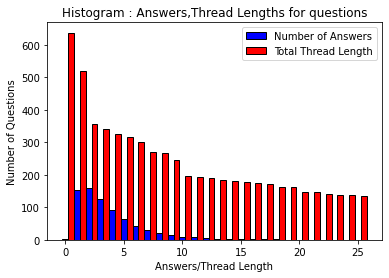

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
     
n=26
r = np.arange(n)
width = 0.50
bars = ('500000', '1000000', '1500000', '2000000', '2500000')
y_pos = np.arange(len(bars))  
  
plt.bar(r, x_axisNew[:26], color = 'b',
        width = width, edgecolor = 'black',
        label='Number of Answers')
plt.bar(r + width, y_axis[:26], color = 'r',
        width = width, edgecolor = 'black',
        label='Total Thread Length')
  
plt.xlabel("Answers/Thread Length")
plt.ylabel("Number of Questions")
plt.title("Histogram : Answers,Thread Lengths for questions")
  
plt.legend()
plt.savefig('abc')
plt.show()